# Feature Description and Matching
## Scale-invariant Feature Transform (SIFT)

Import the packages and load the image `Book.jpg`

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread("Book.jpg")

b,g,r = cv2.split(img) # Changing the order from bgr to rgb so that matplotlib can show it
img = cv2.merge([r,g,b])
plt.imshow(img)

We'll start by converting the image to grayscale.

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

Now we will attempt to find the features and descriptors using [SIFT](https://docs.opencv.org/4.7.0/d7/d60/classcv_1_1SIFT.html). In OpenCV we will do it by first creating a SIFT object using `cv2.SIFT_create`, and then use the class method `detectAndCompute`.

In [4]:
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None) #Keypoints and descriptors

To show the detected keypoints we use the function [`cv2.drawKeyPoints`](https://docs.opencv.org/4.7.0/d4/d5d/group__features2d__draw.html#ga5d2bafe8c1c45289bc3403a40fb88920). We scale the picture up by passing the argument `figsize`, so it's easier to see.

In [ ]:
kp_img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,10))
plt.imshow(kp_img)

Let's load the image `More_books.jpg` and convert it to grayscale.

In [ ]:
img2 = cv2.imread("More_books.jpg")
b,g,r = cv2.split(img2) # Changing the order from bgr to rgb so that matplotlib can show it
img2 = cv2.merge([r,g,b])

gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(gray2, cmap = 'gray')

We use the same SIFT method again to find the keypoints and descriptors of this image.

In [7]:
kp2, des2 = sift.detectAndCompute(gray2, None)

Now that we have the descriptors of both images, let's see if we can match them and find the book from the first image in the second image.
For this example we use the **Brute Force Matcher** ([`cv2.BFMatcher`](https://docs.opencv.org/4.7.0/d3/da1/classcv_1_1BFMatcher.html)). We use the function `cv2.match` to find the matches.

In [8]:
bf = cv2.BFMatcher()
matches = bf.match(des, des2)

We use the function [`cv2.drawMatches`](https://docs.opencv.org/4.7.0/d4/d5d/group__features2d__draw.html#gad8f463ccaf0dc6f61083abd8717c261a) to display the result. We'd like to display the best of the matches. The matching is made using a distance measurement between the descriptor: The smaller the distance, the better the match. So we sort the `matches` array using the distance term and then we plot only the first 100 matches.

In [ ]:
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(gray,kp,gray2,kp2,matches[:100],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (20,20))
plt.imshow(img3)

We see that most of the matches are correct, but with some outliers.

# Exercise 3
Using the same two images, try to use Oriented BRIEF ([ORB](https://docs.opencv.org/4.7.0/db/d95/classcv_1_1ORB.html)) instead of SIFT to find the keypoints and the descriptors. Does one of these methods give a better result than the other? Try plotting more than just the best 100 matches and see if there is a difference between the two methods.

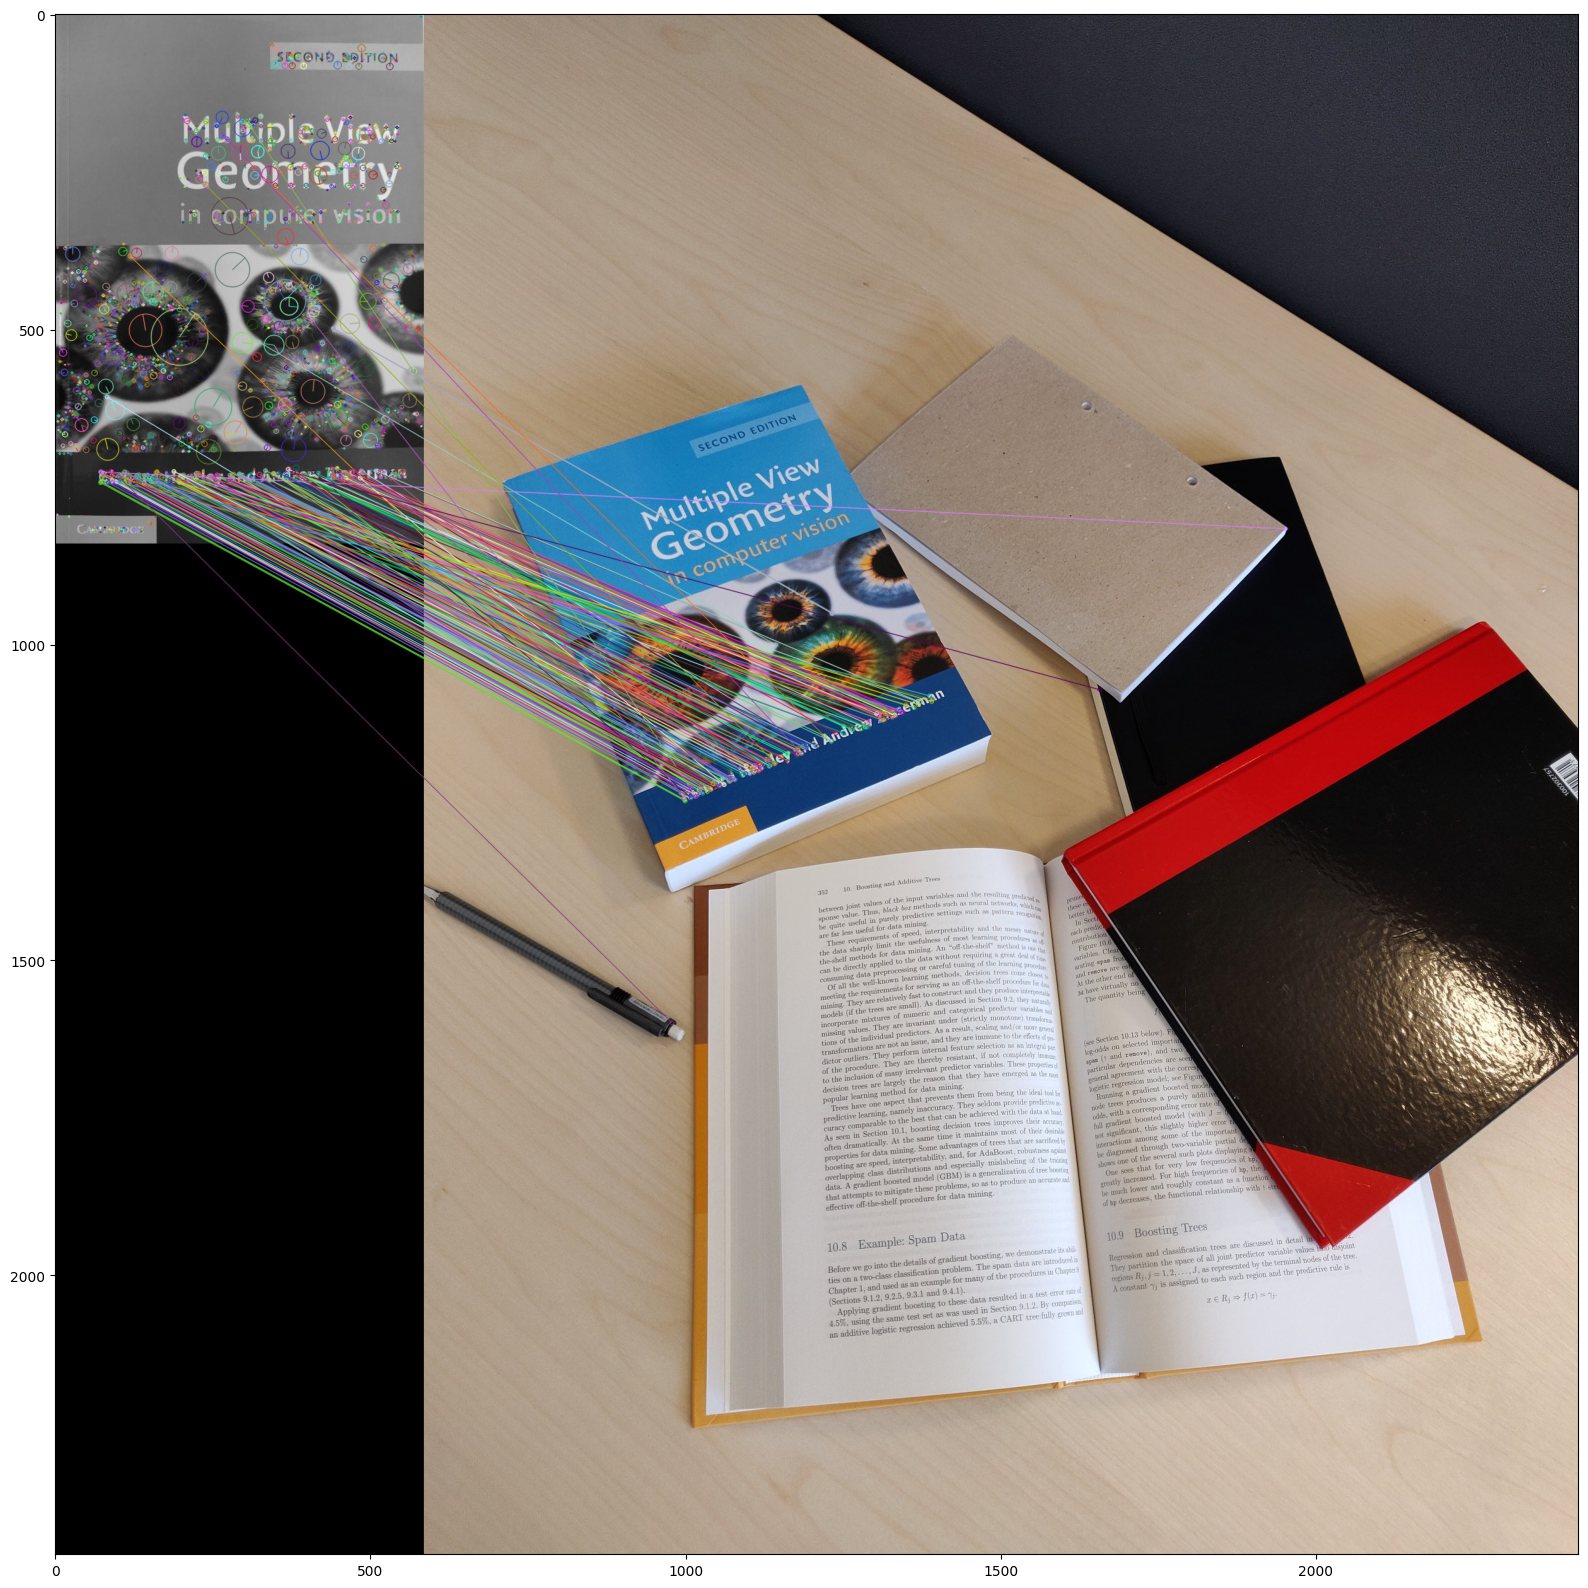

In [10]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img, kp1, img2, kp2, matches[:200], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 20))
plt.imshow(img_matches)
